<a href="https://colab.research.google.com/github/eubrunoread/InvestigaDados/blob/main/notebook/Hashes_e_Metadados_de_Arquivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SOLUÇÃO PARA LEITURA DE METADADOS E CÁLCULO DE HASH DE ARQUIVOS**
----
*Desenvolvido pelo Agente PCSC **Bruno Bevilaqua Lemos** como parte de um projeto pessoal de aprendizagem de Phyton, sugestões ou correções podem ser enviadas para bruno-lemos@pc.sc.gov.br*

----

*Para rodar código pressione CTRL+F9, ou vá clicando no botão 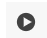 em cada célula.*

-----
Este código faz o upload, processamento de arquivos informando suas tags de metadados (pode ser criado um dicionário com a tradução das tags) e calculando o código HASH (pode ser configurado o algoritmo de cálculo), gerando um arquivo TXT com o conteúdo.

###**Fluxo geral:**

1. O usuário faz upload dos arquivos a serem processados (pode se processar multiplos arquivos ao mesmo tempo).

2. O script lê, processa e exibe os dados.

3. A transcrição é gerada e salva em um arquivo TXT que pode ser baixado.
----
##**O que são Hashes e Metadados**
----


**Hashes**

Um hash é como uma "impressão digital" de um conjunto de dados. É uma sequência de números e letras gerada a partir de informações, como um arquivo ou uma senha.



*Por que é útil?*

*Verificação:* Ajuda a verificar se os dados foram alterados. Se você baixar um arquivo e calcular o hash, pode compará-lo com o hash original para ver se tudo está intacto.

*Segurança:* Armazena senhas de forma segura. Em vez de guardar a senha real, guarda-se o hash dela. Assim, mesmo que alguém acesse o banco de dados, não verá as senhas verdadeiras.



*É possivel dois arquivos diferente terem o mesmo Hash?*



Sim, **a chamada colisão de hashes é téoricamente possivel**, porém praticamente impossivel.Para o algoritmo SHA-256 gera um hash de 256 bits, o que resulta em aproximadamente 1,1 x 10²⁷⁶ combinações possíveis. Na Terra estima-se que existam cerca de 7,5 x 10¹⁸ grãos de areia em todas as praias do mundo.

Se pegarmos o número de combinações possíveis com SHA-256 e compararmos com os grãos de areia as Isso significa que o número de combinações possíveis de SHA-256 é cerca de 1,5 x 10⁵⁸ vezes maior do que o número estimado de grãos de areia na Terra.

*Imagine que cada grão de areia fosse uma galáxia cheia de estrelas e que cada estrela representasse milhões de grãos de areia. Mesmo assim, o número total de possibilidades do SHA-256 ainda seria imensamente maior!*  

-----
**Metadados**

*O que é?*

Metadados são dados sobre outros dados. Eles fornecem informações adicionais que ajudam a entender, organizar e encontrar esses dados.

*Exemplos:*

Em uma foto, os metadados podem incluir quando e onde a foto foi tirada, e qual câmera foi usada.
Em um documento, podem incluir o autor, a data de criação e o tipo de arquivo.

*Por que é útil?*

Metadados ajudam a encontrar e organizar informações facilmente. Eles são como etiquetas que ajudam a entender melhor os dados.

**Instalação de Bibliotecas e definição de funções**

In [ ]:
# Instalar pyexiftool e exiftool
!pip install pyexiftool
!apt-get install -y exiftool

import hashlib
from exiftool import ExifToolHelper
from google.colab import files

# Função para calcular o hash do arquivo com base na escolha do algoritmo
def calcular_hash(arquivo, algoritmo):
    hash_obj = hashlib.new(algoritmo)
    with open(arquivo, "rb") as f:
        # Lê e atualiza o hash com blocos de 4KB
        for byte_block in iter(lambda: f.read(4096), b""):
            hash_obj.update(byte_block)
    return hash_obj.hexdigest()

**Upload de Arquivos**

Clique no botão 'Escolher arquivos' e selecione os arquivos em seu computador.

In [10]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Upload do arquivo "{name}" com {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

**Tradução das TAGs de Metadados**

Adicione ao dicionarios as TAGs de metadados que deseja traduzir, caso não queira traduzir basta pular esta célula.

In [ ]:
# Dicionário de tradução de chaves de metadados para português
traducao_chaves = {
    "FileName": "Nome do Arquivo",
    "Directory": "Diretório",
    "FileSize": "Tamanho do Arquivo",
    "FileModifyDate": "Data de Modificação",
    "FileAccessDate": "Data de Acesso",
    "FileInodeChangeDate": "Data de Alteração do Inode",
    "FilePermissions": "Permissões do Arquivo",
    "FileType": "Tipo de Arquivo",
    "FileTypeExtension": "Extensão do Tipo de Arquivo",
    "MIMEType": "Tipo MIME",
    "VP8Version": "Versão VP8",
    "ImageWidth": "Largura da Imagem",
    "HorizontalScale": "Escala Horizontal",
    "ImageHeight": "Altura da Imagem",
    "VerticalScale": "Escala Vertical",
    "ImageSize": "Tamanho da Imagem",
    "Megapixels": "Megapixels",
    "Make": "Fabricante",
    "Model": "Modelo",
    "ISO": "ISO",
    "ExposureTime": "Tempo de Exposição",
    "FNumber": "Abertura",
    "Flash": "Flash",
    # Adicione mais traduções conforme necessário
}

**Escolha o argoritmo para o cáculo de hash**

Por padrão o algoritmo é o SHA-256, caso queira utilizar outro, basta colocar substituir nesta parte do código
image.png

In [ ]:
# Escolher o algoritmo de hash
algoritmos_disponiveis = ['md5', 'sha1', 'sha256', 'sha512', 'blake2b', 'blake2s']
algoritmo_selecionado = 'sha256'  # Você pode alterar para o algoritmo desejado

**Processamento dos arquivos**

In [ ]:
# Capturar a saída e salvar em um arquivo
with open("Metadados.txt", "w", encoding='utf-8') as f:
    for fn in uploaded.keys():
        # Calcular o hash do arquivo
        hash_arquivo = calcular_hash(fn, algoritmo_selecionado)

        # Abrir o ExifToolHelper e ler os metadados
        with ExifToolHelper() as et:
            metadata = et.get_metadata(fn)

            # Escrever e exibir o hash e os metadados no arquivo e console
            print(f"Metadados para o arquivo '{fn}':")
            print(f"Hash ({algoritmo_selecionado.upper()}): {hash_arquivo}\n")
            f.write(f"Metadados para o arquivo '{fn}':\n")
            f.write(f"Hash ({algoritmo_selecionado.upper()}): {hash_arquivo}\n")

            for d in metadata:
                for k, v in d.items():
                    chave_sem_prefixo = k.split(":")[-1]
                    chave_traduzida = traducao_chaves.get(chave_sem_prefixo, chave_sem_prefixo)
                    print(f"{chave_traduzida}: {v}")
                    f.write(f"{chave_traduzida}: {v}\n")
            print("\n" + "-" * 50 + "\n")  # Linha de separação entre arquivos
            f.write("\n" + "-" * 50 + "\n")  # Linha de separação entre arquivos

# Mensagem de conclusão
print("Processamento concluído. A saída foi salva em 'Metadados.txt'.")

#**Download do arquivo txt com os hashes e metadados**

In [ ]:
 files.download("Metadados.txt")